In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTE DE BIBLIOTECAS, MODULOS Y FUNCIONES NECESARIAS**

In [183]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import resample, shuffle
import matplotlib.pyplot as plt

**LECTURA, LIMPIEZA Y PREPARACIÓN DE DATOS**

(14640, 2)


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

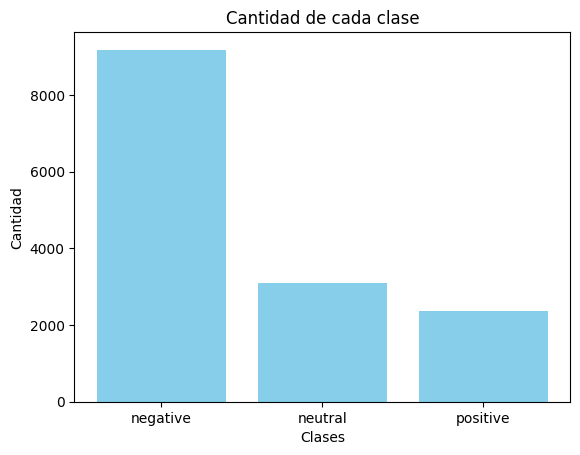

In [184]:
#Leemos el csv y nos quedamos con los sentimientos y los comentarios que es lo que nos interesa para el ejercicio
df=pd.read_csv('/content/drive/MyDrive/Tweets.csv')
df=df[['airline_sentiment','text']]

#Graficamos la cantidad de datos de cada sentimiento para ver si es necesario balancear las clases
# Calcular la cantidad de cada clase
conteo_clases = df['airline_sentiment'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo_clases.index, conteo_clases.values, color='skyblue')

plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada clase')
#Nos damos que cuenta que hay que balancear clases pero aun asi vamos a probar con todos los datos que por la cantidad de datos es mejor

#Creamos las listas textos y etiquetas con los valores de text y airline_sentiment respectivamente
texts=df['text'].values
labels=df['airline_sentiment'].values

#Vamos a utilizar LabelEncoder para convertir etiquetas a números y asi aplicar codificacion one hot a estos
label_encoder = LabelEncoder()
print(df.shape)

# Convertimos las etiquetas a números
encoded_data = label_encoder.fit_transform(labels)

# Convertimos los números a representación one-hot
labels = to_categorical(encoded_data)
labels

Ahora vamos a tokenizar los textos, ajustar la longitud de las secuencias, preparar las etiquetas en un formato adecuado para el modelo y dividir los datos en conjuntos de entrenamiento, validación y prueba.

In [185]:
# TOKENIZACION
# Tamaño de la secuencia de tokens
maxlen = 100

# Número de secuencias que se van a utilizar para entrenar a la red
training_samples = 10000

# Número de secuencias que se van a utilizar para validar la red
validation_samples = 2640

# Número máximo de palabras a considerar (se seleccionarán las palabras más frecuentes)
max_words = 10000

# Creamos un objeto Tokenizer especificando el número máximo de palabras a tokenizar (num_words).
# Este objeto se va a utilizar para convertir texto en secuencias de números enteros.
tokenizer = Tokenizer(num_words=max_words)

# Utilizamos fit_on_texts para ajusta el Tokenizer a los textos ('texts').
tokenizer.fit_on_texts(texts)

# Con texts_to_sequences convertimos las secuencias de texto del Tokenizer ajustado a secuencias de números enteros.
sequences = tokenizer.texts_to_sequences(texts)

# word_index contiene el mapeo de palabras a índices.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

#AJUSTAR LONGITUD DE LAS SECUENCIAS
# Aseguramos que todas las secuencias tengan la misma longitud con Pad sequences. De esta forma si la secuencia por ejemplo tiene 3 palabras/tokens y antes era de esta forma [1,45,23],
# ahora sera [0,0,0..1,45,23] que es una vector de tamaño 1xmaxlen, o si la secuencia tiene 5 palabras/tokens y antes era [10,54,103,4,35], ahora sera [0,0...10,54,103,4,35] de tamaño 1xmaxlen.
# Esto es necesario ya que no es posible entrenar una red con secuencias de distintos tamaños y además no influye en nada ya que podemos indicarle a la red que pase de los ceros.
data = pad_sequences(sequences, maxlen=maxlen)

#REFORMATEAR ETIQUETAS
# Convertir las etiquetas a un formato adecuado para el modelo
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

#DIVISION DE DATOS
# Mezclar y dividir los datos en conjuntos de entrenamiento, validación y prueba
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
sequences=np.array(sequences)[indices]

# Conjunto de entrenamiento
x_train = data[:training_samples]
y_train = labels[:training_samples]

# Conjunto de validación
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

# Conjunto de prueba
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]
x_test

Found 15768 unique tokens.
Shape of data tensor: (14640, 100)
Shape of label tensor: (14640, 3)


<ipython-input-185-a4f2806c06fd>:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences=np.array(sequences)[indices]


array([[   0,    0,    0, ...,  188,  384,  117],
       [   0,    0,    0, ..., 2462, 5331,  111],
       [   0,    0,    0, ...,  210,  256, 9810],
       ...,
       [   0,    0,    0, ...,    5, 8349,   54],
       [   0,    0,    0, ...,   19,   69,  121],
       [   0,    0,    0, ...,  276,    4, 1215]], dtype=int32)

In [186]:
sequences[10]

[16,
 31,
 1,
 131,
 61,
 9930,
 1,
 253,
 864,
 15,
 197,
 64,
 29,
 53,
 45,
 14,
 90,
 214,
 90,
 2277]

In [187]:
x_train[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   16,   31,    1,  131,   61, 9930,    1,  253,
        864,   15,  197,   64,   29,   53,   45,   14,   90,  214,   90,
       2277], dtype=int32)

**CREACIÓN DE LA RED**

In [188]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, Dropout, LSTM

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, Dropout, LSTM

# Crear un modelo secuencial
model = Sequential()

# Capa de Embedding: transforma secuencias de índices en secuencia de vectores densos, es decir por cada indice de la secuencia crea un vector(embedding)
# en este caso de 500 dimensiones (1x500), y como input_length que es la longitud de las secuencias (maxlen) es 100 el resultado sera una matriz 100x300
# max_words es el número máximo de palabras que considera el Tokenizer.
model.add(Embedding(max_words, 500, input_length=maxlen))

# Capa LSTM: red recurrente de tipo LSTM con 128 unidades, devuelve todos los estados
model.add(LSTM(128, return_sequences=True))
# Capa LSTM adicional con 128 unidades, devuelve todos los estados
model.add(LSTM(128, return_sequences=True))

# Capa Dropout: apaga aleatoriamente un porcentaje de unidades durante el entrenamiento para prevenir el sobreajuste
model.add(Dropout(0.2))

# Otras dos capas LSTM con 128 unidades y que devuelven todos los estados
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
# Última capa LSTM con 128 unidades, solo devuelve el ultimo estado (se usa para la última capa LSTM)
model.add(LSTM(128))

# Capa densa con 3 unidades y función de activación softmax ya que se trata de problema de clasificacion en 3 clases
model.add(Dense(3, activation='softmax'))

# Resumen del modelo, que muestra la arquitectura y el número de parámetros entrenables
model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 100, 500)          5000000   
                                                                 
 lstm_108 (LSTM)             (None, 100, 128)          322048    
                                                                 
 lstm_109 (LSTM)             (None, 100, 128)          131584    
                                                                 
 dropout_24 (Dropout)        (None, 100, 128)          0         
                                                                 
 lstm_110 (LSTM)             (None, 100, 128)          131584    
                                                                 
 lstm_111 (LSTM)             (None, 100, 128)          131584    
                                                                 
 lstm_112 (LSTM)             (None, 128)             

**ENTRENAMIENTO Y EVALUACION DE LA RED**

In [189]:
#Compilamos el modelo utilizando adam como optimizador y categorical_crossentropy como funcion de pérdida ya que se trata de un problema de clasificacion en 3 clases
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
#Entrenamos el modelo durante 10 epocas en lotes de 200 y utilizando (x_val, y_val) como datos de validacion
history = model.fit(x_train, y_train, epochs=5, batch_size=200, validation_data=(x_val, y_val))

Epoch 1/5
50/50 [==============================] - 17s 155ms/step - loss: 0.8608 - acc: 0.6217 - val_loss: 0.6983 - val_acc: 0.6928
Epoch 2/5
50/50 [==============================] - 7s 132ms/step - loss: 0.6404 - acc: 0.7089 - val_loss: 0.6217 - val_acc: 0.7367
Epoch 3/5
50/50 [==============================] - 4s 90ms/step - loss: 0.4931 - acc: 0.7936 - val_loss: 0.5729 - val_acc: 0.7758
Epoch 4/5
50/50 [==============================] - 4s 84ms/step - loss: 0.3488 - acc: 0.8683 - val_loss: 0.5839 - val_acc: 0.7705
Epoch 5/5
50/50 [==============================] - 4s 75ms/step - loss: 0.2605 - acc: 0.9083 - val_loss: 0.6222 - val_acc: 0.7822


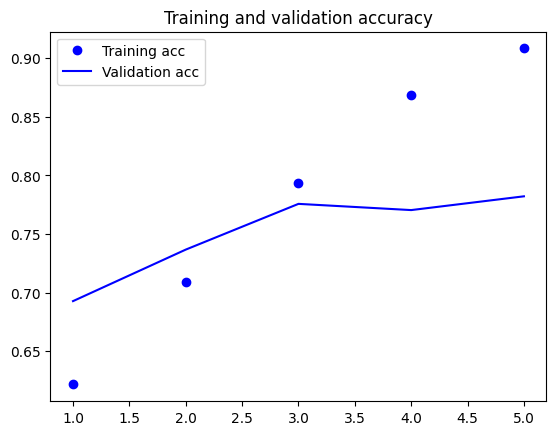

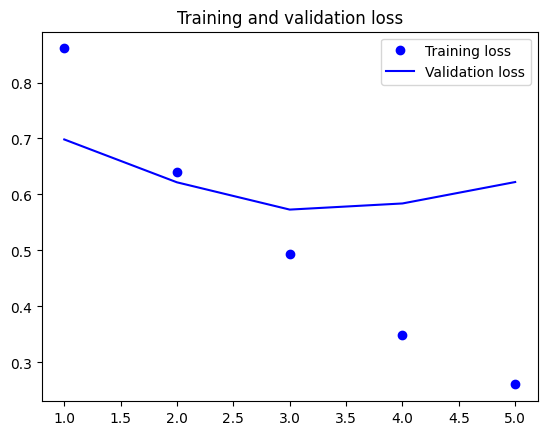

In [190]:
import matplotlib.pyplot as plt

#Graficamos la accuracy y loss a lo largo de las epochs durante el entrenamiento y la validación para comprobar si se produce overfitting o underfitting

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [191]:
#Evaluar el modelo en x_test
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 16ms/step - loss: 0.6540 - acc: 0.7830


[0.6539594531059265, 0.7829999923706055]